<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --upgrade --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib --user -q --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
X = data.iloc[:,1:5].values

In [7]:
X.shape

(150, 4)

In [8]:
# preparing training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(X,test_size=0.20, random_state=0)

In [9]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

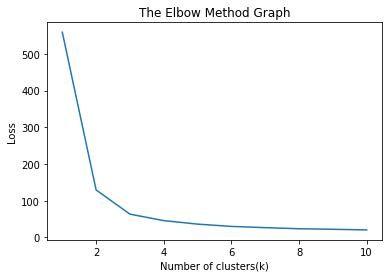

In [13]:
loss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x_train)
  loss.append(kmeans.inertia_)
plt.plot(range(1,11),loss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Loss')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)

KMeans(n_clusters=3)

In [15]:
kmeans.predict([[7.3,2.9,6.3,1.8]])

array([2], dtype=int32)

In [16]:
y_predict = kmeans.predict(x_test)
y_predict

array([0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

In [17]:
centres = kmeans.cluster_centers_

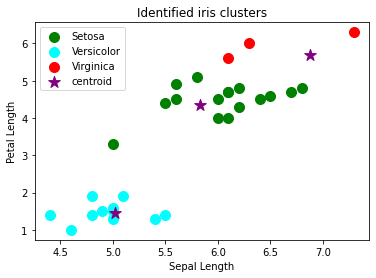

In [18]:
# plotting the clusters 
plt.scatter(x_test[y_predict == 0, 0], x_test[y_predict == 0, 2], s = 100, c = 'green', label = 'Setosa')
plt.scatter(x_test[y_predict == 1, 0], x_test[y_predict == 1, 2], s = 100, c = 'cyan', label = 'Versicolor')
plt.scatter(x_test[y_predict == 2, 0], x_test[y_predict == 2, 2], s = 100, c = 'red', label = 'Virginica')
plt.scatter(centres[:,0],centres[:,2],c='purple',s=150, marker='*', label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Identified iris clusters')
plt.legend()